## Importing libraries

In [5]:
## Data Analysis
import numpy as np
import pandas as pd

## Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [13]:
dataset = pd.read_csv("heart_disease.csv")
type(dataset)

pandas.core.frame.DataFrame

In [16]:
dataset.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [15]:
dataset['13'].replace(2,1,inplace=True)
dataset['13'].replace(3,1,inplace=True)
dataset['13'].replace(4,1,inplace=True)

## Preprocessing - Handling Missing Values

In [17]:
dataset.replace('?',np.nan,inplace=True)
full_NA = dataset.isnull().sum()
full_NA = full_NA.drop(full_NA[full_NA == 0].index).sort_values(ascending = False)
print(full_NA)

11    4
12    2
dtype: int64


In [18]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy ="mean", axis = 0)
imputer = imputer.fit(dataset.iloc[:,:].values)   
dataset = imputer.transform(dataset)
dataset = pd.DataFrame(dataset, columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

In [19]:
dataset.shape

(303, 14)

In [20]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.672241,3.0,0.0


## Exploratory Analysis

In [21]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### density plots for each numerical features to see their distibutions:

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has

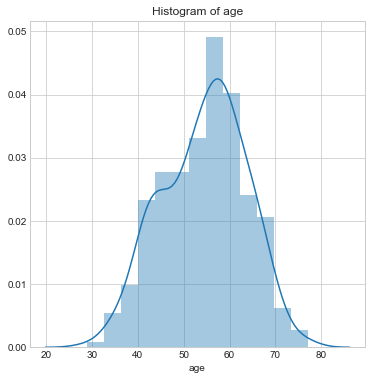

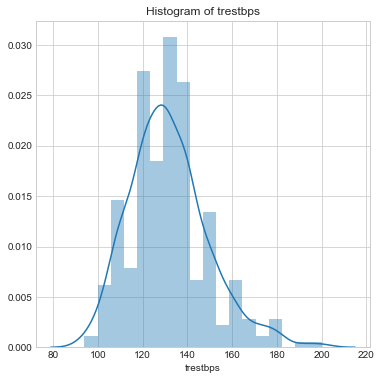

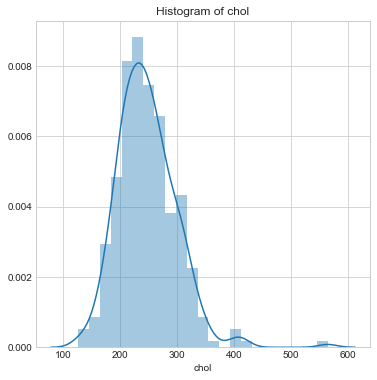

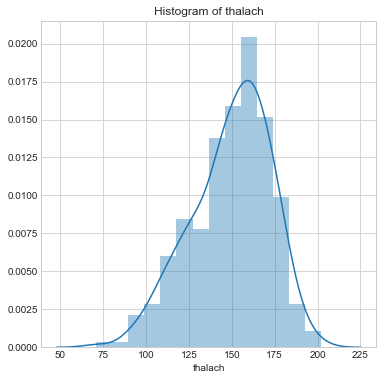

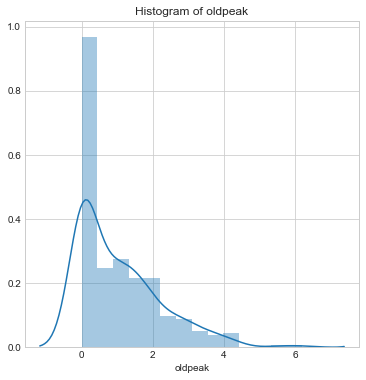

In [22]:
def plot_density_hist(train, cols, bins = 10, hist = True):
    for col in cols:
        fig = plt.figure(figsize = (6,6))
        sns.set_style("whitegrid")
        sns.distplot(train[col].dropna(), hist = hist)
        plt.title("Histogram of " + col)
        plt.xlabel(col)
        plt.ylabel("")
        plt.show

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plot_density_hist(dataset, num_cols)

### scatterplots to see the relationship between each numerical features with target:

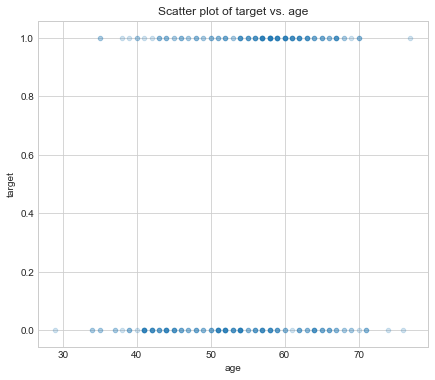

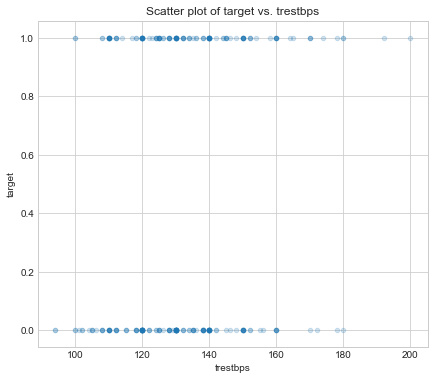

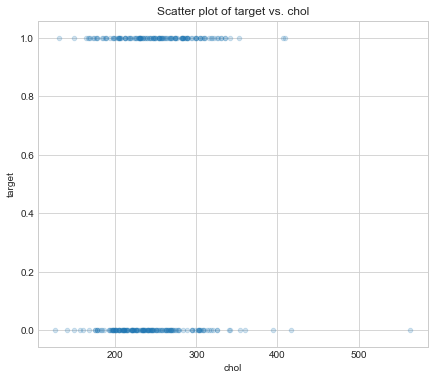

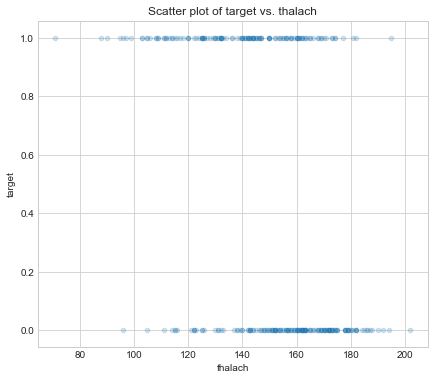

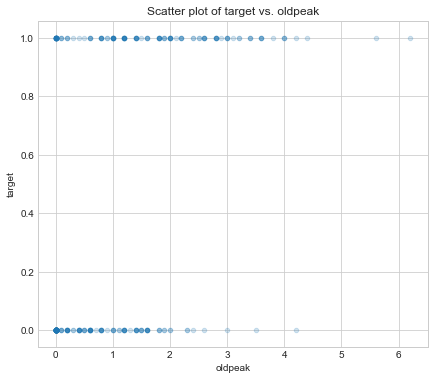

In [23]:
def plot_scatter_t(train, cols, col_y = "target", alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) 
        ax = fig.gca()    
        train.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel(col_y)
        plt.show()

plot_scatter_t(dataset, num_cols, alpha = 0.2)

### boxplots to see the relationship between heart disease mortality with the categorical features

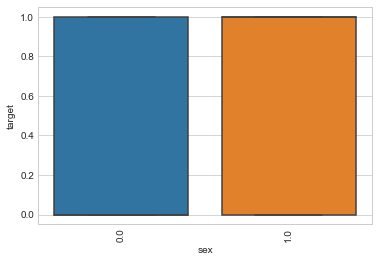

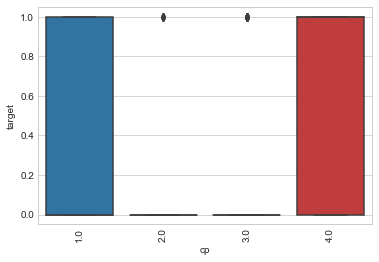

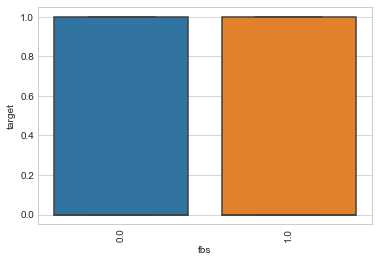

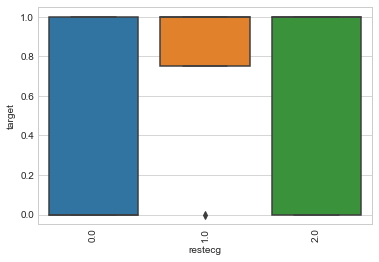

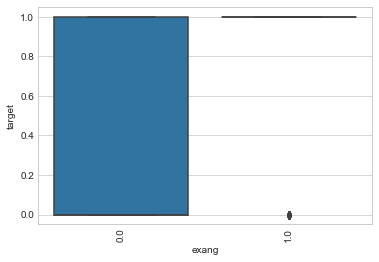

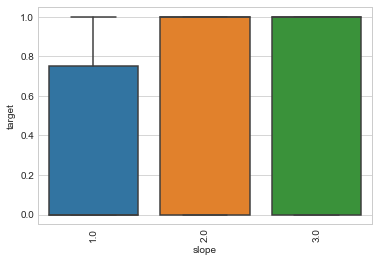

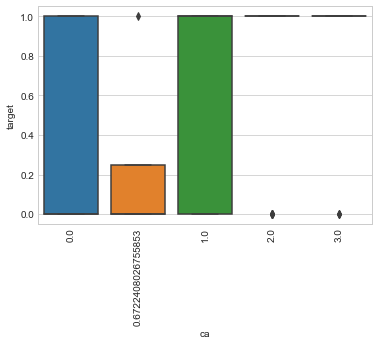

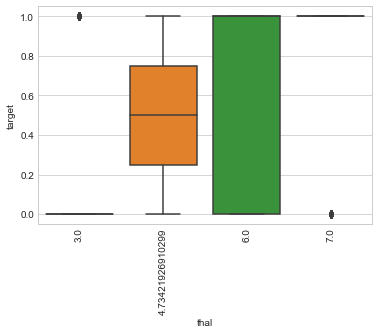

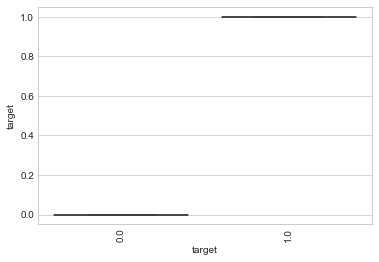

In [24]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
def plot_box(train, cols, col_y = "target"):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data = train)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.xticks(rotation=90)
        plt.show()
        
plot_box(dataset, cat_cols) 

### Correlation Map


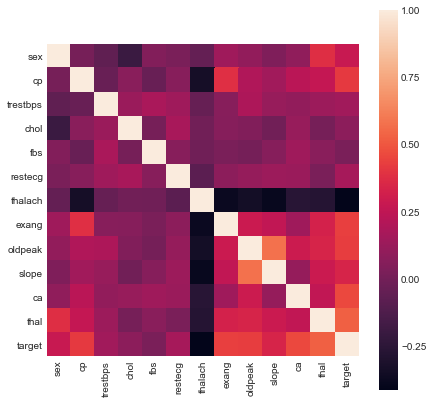

In [26]:
corr = dataset.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, vmax=1, square=True)

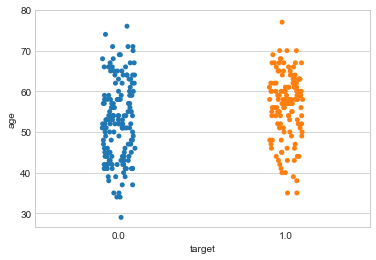

In [29]:
v=sns.stripplot(x="target",y="age",data=dataset,jitter=True)

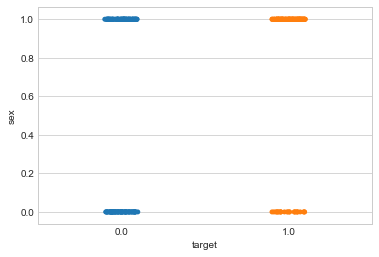

In [30]:
v=sns.stripplot(x="target",y="sex",data=dataset,jitter=True)

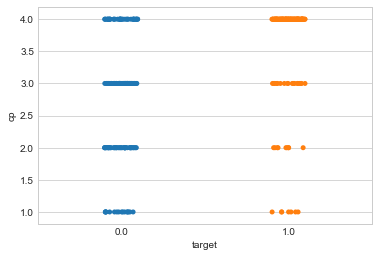

In [31]:
v=sns.stripplot(x="target",y="cp",data=dataset,jitter=True)

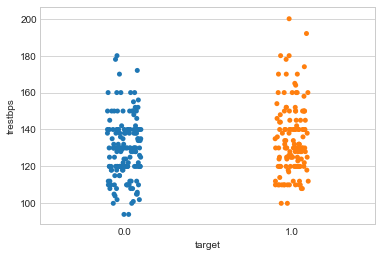

In [32]:
v=sns.stripplot(x="target",y="trestbps",data=dataset,jitter=True)

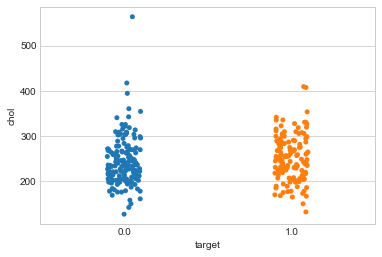

In [33]:
v=sns.stripplot(x="target",y="chol",data=dataset,jitter=True)

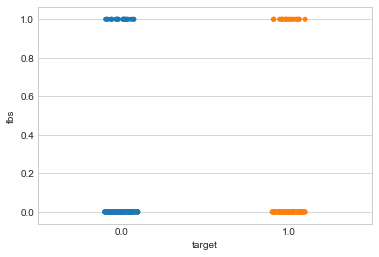

In [34]:
v=sns.stripplot(x="target",y="fbs",data=dataset,jitter=True)

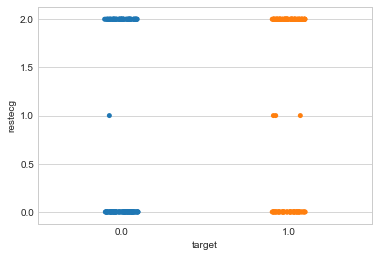

In [35]:
v=sns.stripplot(x="target",y="restecg",data=dataset,jitter=True)

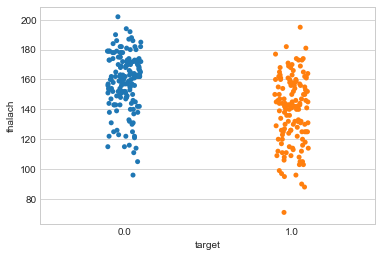

In [36]:
v=sns.stripplot(x="target",y="thalach",data=dataset,jitter=True)

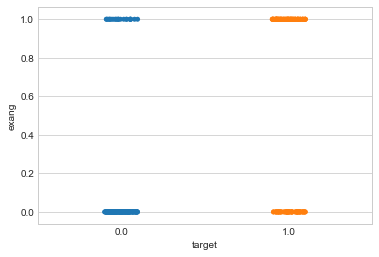

In [37]:
v=sns.stripplot(x="target",y="exang",data=dataset,jitter=True)

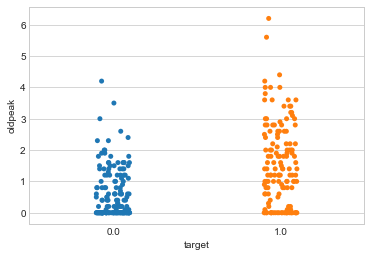

In [38]:
v=sns.stripplot(x="target",y="oldpeak",data=dataset,jitter=True)

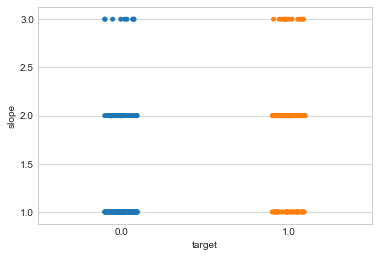

In [39]:
v=sns.stripplot(x="target",y="slope",data=dataset,jitter=True)

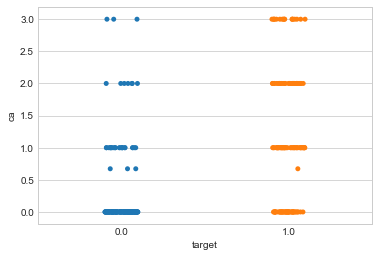

In [40]:
v=sns.stripplot(x="target",y="ca",data=dataset,jitter=True)

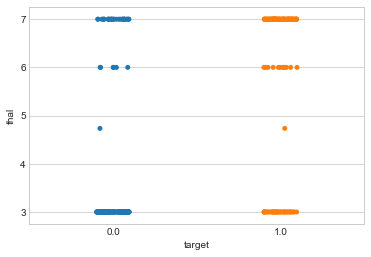

In [41]:
v=sns.stripplot(x="target",y="thal",data=dataset,jitter=True)